In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
import json
import folium

from sklearn import preprocessing 

import squarify

In [3]:
# !apt_get install -y fonts-nanum > /dev/null
# !fc-cache -fv > /dev/nanum
# !rm -rf ~/.cache/matplotlib > /dev/null


mpl.rcParams['axes.unicode_minus'] = False
plt.rc('font', family='Malgun Gothic')

In [4]:
df1 = pd.read_csv('관광지출액/20230508094333_관광소비 히트맵.csv', encoding='cp949')
df2 = pd.read_csv('관광지출액/20230508094333_업종별 지출액.csv', encoding='cp949')
df3 = pd.read_csv('관광지출액/20230508094333_지역별 지출액.csv', encoding='cp949')
df4 = pd.read_csv('관광지출액/20230508094333_관광소비 추이.csv', encoding='cp949')

지역별내국인지출액

업종별 지출액:
숙박업 따로 빼서 분석

관광소비추이: 대분류로 groupby 한후 대분류별 총 지출액 분석
년도별 총(모든대분류) 지출액 분석

# df1

In [5]:
df1

,광역지자체,소비액,전년동기 소비액,전년대비 소비증감률
0,서울특별시,5.590000e+10,4.390000e+10,27.2
1,부산광역시,1.450000e+10,1.150000e+10,26.3
2,대구광역시,8.160000e+09,6.400000e+09,27.5
3,인천광역시,9.060000e+09,7.310000e+09,23.9
4,광주광역시,4.560000e+09,3.610000e+09,26.2
5,대전광역시,6.150000e+09,4.660000e+09,32.0
6,울산광역시,2.710000e+09,2.160000e+09,25.6
7,세종특별자치시,4.680000e+08,3.680000e+08,27.2
8,경기도,4.310000e+10,3.370000e+10,27.9
9,강원도,5.990000e+09,4.630000e+09,29.5


In [14]:
광역지자체 = df1['광역지자체'].tolist()
광역지자체

['서울특별시',
 '부산광역시',
 '대구광역시',
 '인천광역시',
 '광주광역시',
 '대전광역시',
 '울산광역시',
 '세종특별자치시',
 '경기도',
 '강원도',
 '충청북도',
 '충청남도',
 '전라북도',
 '전라남도',
 '경상북도',
 '경상남도',
 '제주특별자치도']

In [17]:
소비액 = df1['소비액'].tolist()
소비액

[55900000000.0,
 14500000000.0,
 8160000000.0,
 9060000000.0,
 4560000000.0,
 6150000000.0,
 2710000000.0,
 468000000.0,
 43100000000.0,
 5990000000.0,
 4840000000.0,
 5480000000.0,
 4010000000.0,
 4270000000.0,
 5900000000.0,
 7320000000.0,
 4960000000.0]

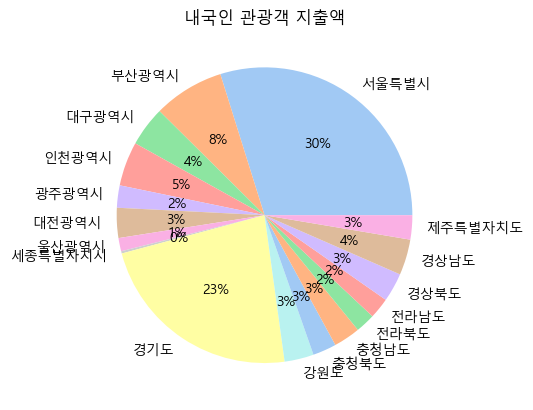

In [20]:
data = 소비액
labels = 광역지자체

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("내국인 관광객 지출액")
plt.show()

# df2

In [6]:
df2

,대분류,중분류,대분류 지출액,대분류 지출액 비율,중분류 지출액,중분류 지출액 비율
0,쇼핑업,관광기념품,6.166341e+10,32.9,3.513356e+08,0.6
1,쇼핑업,대형쇼핑몰,6.166341e+10,32.9,4.804665e+10,77.9
2,쇼핑업,레저용품쇼핑,6.166341e+10,32.9,1.104668e+10,17.9
3,쇼핑업,면세점,6.166341e+10,32.9,2.218740e+09,3.6
4,숙박업,기타숙박,7.307243e+09,3.9,3.759804e+09,51.5
5,숙박업,캠핑장/펜션,7.307243e+09,3.9,3.884011e+07,0.5
6,숙박업,콘도,7.307243e+09,3.9,1.035736e+09,14.2
7,숙박업,호텔,7.307243e+09,3.9,2.472863e+09,33.8
8,식음료업,식음료,9.774796e+10,52.1,9.774796e+10,100.0
9,여가서비스업,골프장,1.325986e+10,7.1,8.606732e+09,64.9


In [7]:
df2_accom = df2[(df2['대분류'] == '숙박업')]
df2_accom

,대분류,중분류,대분류 지출액,대분류 지출액 비율,중분류 지출액,중분류 지출액 비율
4,숙박업,기타숙박,7.307243e+09,3.9,3.759804e+09,51.5
5,숙박업,캠핑장/펜션,7.307243e+09,3.9,3.884011e+07,0.5
6,숙박업,콘도,7.307243e+09,3.9,1.035736e+09,14.2
7,숙박업,호텔,7.307243e+09,3.9,2.472863e+09,33.8


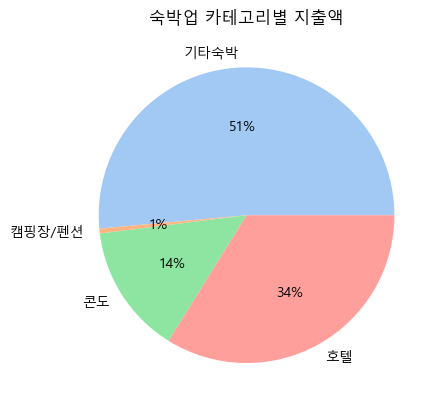

In [21]:
data = df2_accom['중분류 지출액'].tolist()
labels = df2_accom['중분류'].tolist()

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("숙박업 카테고리별 지출액")
plt.show()

# df3

In [27]:
df3

,광역지자체 명,기초지자체 명,광역지자체 지출액,광역지자체 지출액 비율,기초지자체 지출액,기초지자체 지출액 비율
0,기타(지역 미분류),기타(지역 미분류),4.906919e+07,0.0,4.906919e+07,100.0
1,강원도,강릉시,5.994282e+09,3.2,9.836776e+08,16.4
2,강원도,고성군,5.994282e+09,3.2,2.194777e+08,3.7
3,강원도,동해시,5.994282e+09,3.2,2.165276e+08,3.6
4,강원도,삼척시,5.994282e+09,3.2,2.681303e+08,4.5
...,...,...,...,...,...,...
246,충청북도,청주시 상당구,4.843360e+09,2.6,5.819891e+08,12.0
247,충청북도,청주시 서원구,4.843360e+09,2.6,5.883530e+08,12.1
248,충청북도,청주시 청원구,4.843360e+09,2.6,5.974067e+08,12.3
249,충청북도,청주시 흥덕구,4.843360e+09,2.6,1.067174e+09,22.0


In [31]:
seoul_expend = df3[(df3['광역지자체 명'] == '서울특별시')]
seoul_expend

,광역지자체 명,기초지자체 명,광역지자체 지출액,광역지자체 지출액 비율,기초지자체 지출액,기초지자체 지출액 비율
141,서울특별시,강남구,5.585151e+10,29.8,8.057663e+09,14.4
142,서울특별시,강동구,5.585151e+10,29.8,1.078954e+09,1.9
143,서울특별시,강북구,5.585151e+10,29.8,7.402471e+08,1.3
144,서울특별시,강서구,5.585151e+10,29.8,3.484450e+09,6.2
145,서울특별시,관악구,5.585151e+10,29.8,1.262281e+09,2.3
146,서울특별시,광진구,5.585151e+10,29.8,1.442734e+09,2.6
147,서울특별시,구로구,5.585151e+10,29.8,1.613296e+09,2.9
148,서울특별시,금천구,5.585151e+10,29.8,1.514838e+09,2.7
149,서울특별시,노원구,5.585151e+10,29.8,1.271615e+09,2.3
150,서울특별시,도봉구,5.585151e+10,29.8,5.537446e+08,1.0


In [32]:
seoul_expend = seoul_expend.sort_values(by = '기초지자체 지출액')
seoul_expend

,광역지자체 명,기초지자체 명,광역지자체 지출액,광역지자체 지출액 비율,기초지자체 지출액,기초지자체 지출액 비율
150,서울특별시,도봉구,5.585151e+10,29.8,5.537446e+08,1.0
165,서울특별시,중랑구,5.585151e+10,29.8,6.612328e+08,1.2
143,서울특별시,강북구,5.585151e+10,29.8,7.402471e+08,1.3
157,서울특별시,성북구,5.585151e+10,29.8,8.428359e+08,1.5
162,서울특별시,은평구,5.585151e+10,29.8,8.754465e+08,1.6
159,서울특별시,양천구,5.585151e+10,29.8,9.579102e+08,1.7
152,서울특별시,동작구,5.585151e+10,29.8,9.626210e+08,1.7
151,서울특별시,동대문구,5.585151e+10,29.8,1.031347e+09,1.8
142,서울특별시,강동구,5.585151e+10,29.8,1.078954e+09,1.9
154,서울특별시,서대문구,5.585151e+10,29.8,1.210090e+09,2.2


In [35]:
서울지역 = seoul_expend['기초지자체 명'].tolist()
서울지역

['도봉구',
 '중랑구',
 '강북구',
 '성북구',
 '은평구',
 '양천구',
 '동작구',
 '동대문구',
 '강동구',
 '서대문구',
 '관악구',
 '노원구',
 '광진구',
 '성동구',
 '금천구',
 '구로구',
 '용산구',
 '종로구',
 '마포구',
 '영등포구',
 '강서구',
 '송파구',
 '서초구',
 '중구',
 '강남구']

In [36]:
서울지출액 = seoul_expend['기초지자체 지출액'].tolist()
서울지출액

[553744600.0,
 661232763.0,
 740247112.0,
 842835897.0,
 875446452.0,
 957910247.0,
 962620958.0,
 1031347227.0,
 1078953909.0,
 1210089791.0,
 1262281452.0,
 1271615469.0,
 1442734426.0,
 1496902096.0,
 1514838223.0,
 1613296335.0,
 2263495066.0,
 2831125901.0,
 2835249448.0,
 3227135604.0,
 3484449797.0,
 3645557503.0,
 5409237583.0,
 6581500434.0,
 8057663241.0]

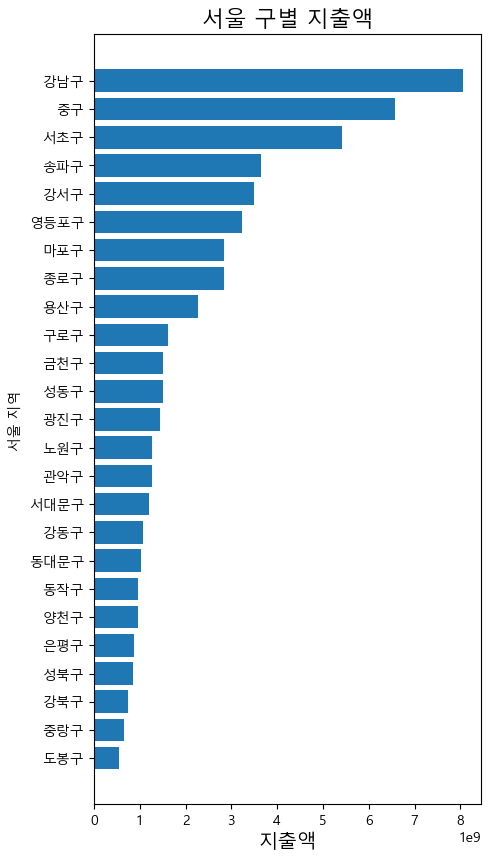

In [39]:
# Set the font name explicitly
plt.rcParams['font.family'] = 'Malgun Gothic'

plt.figure(figsize=(5, 10))
plt.barh(서울지역, 서울지출액, height=0.8, align='center')
plt.title('서울 구별 지출액', fontsize=16)
plt.xlabel('지출액', fontsize=14)
plt.ylabel('서울 지역', fontsize=10)
plt.show()

# df4

In [9]:
df4

,기준년월,광역지자체,대분류,지출액,전년도 지출액
0,2018,전국,관광총소비,4.107603e+10,0.000000e+00
1,2018,전국,호텔,4.917879e+08,0.000000e+00
2,2018,전국,콘도,2.050354e+08,0.000000e+00
3,2018,전국,캠핑장/펜션,4.382556e+06,0.000000e+00
4,2018,전국,기타숙박,8.543274e+08,0.000000e+00
...,...,...,...,...,...
99,2022,전국,골프장,2.209717e+09,1.985028e+09
100,2022,전국,스키장,1.685994e+07,8.593866e+06
101,2022,전국,기타레저,2.801927e+08,2.146110e+08
102,2022,전국,문화서비스,4.741608e+08,2.635746e+08


In [41]:
df4_year_group = df4.groupby('기준년월').sum()
df4_year_group

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_3584\2901269019.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df4_year_group = df4.groupby('기준년월').sum()


,지출액,전년도 지출액
기준년월,,
2018,8.215207e+10,0.000000e+00
2019,8.140220e+10,8.215207e+10
2020,6.508289e+10,8.140220e+10
2021,6.554103e+10,6.508289e+10
2022,8.070468e+10,6.554103e+10


In [50]:
기준연도 = df4['기준년월'].unique().tolist()
기준연도

[2018, 2019, 2020, 2021, 2022]

In [54]:
기준연도 = [int(i) for i in 기준연도]
기준연도

[2018, 2019, 2020, 2021, 2022]

In [55]:
지출액 = df4_year_group['지출액'].tolist()
지출액

[82152066458.0, 81402201352.0, 65082890343.0, 65541027792.0, 80704681568.0]

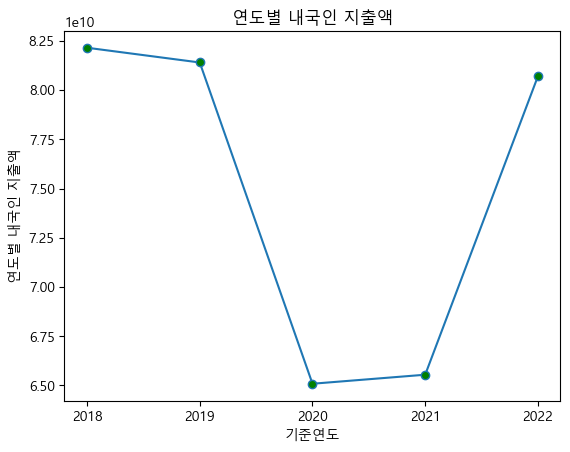

In [57]:
xpoints = 기준연도
ypoints = 지출액
plt.xlabel("기준연도")
plt.ylabel("연도별 내국인 지출액")
plt.plot(xpoints ,ypoints, marker = 'o', markerfacecolor='green')

# Set the x-axis ticks to be integer years
plt.xticks(기준연도)

plt.title("연도별 내국인 지출액")
plt.show()

In [124]:
df4_categ = df4.groupby('대분류').sum().sort_values(by='지출액', ascending=True)
df4_categ

C:\Users\tjoeun\AppData\Local\Temp\ipykernel_3584\819043953.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df4_categ = df4.groupby('대분류').sum().sort_values(by='지출액', ascending=True)


,기준년월,지출액,전년도 지출액
대분류,,,
카지노,8079,5.875000e+03,8.750000e+02
캠핑장/펜션,10100,3.884011e+07,2.718564e+07
스키장,10100,7.924445e+07,6.238451e+07
수상운송,10100,3.319350e+08,2.312144e+08
관광기념품,10100,3.513356e+08,2.599508e+08
렌터카,10100,4.055851e+08,2.932357e+08
여행업,10100,5.264653e+08,4.743093e+08
관광유원시설,10100,5.324932e+08,3.825112e+08
콘도,10100,1.035736e+09,7.622501e+08


In [88]:
# df4['대분류'].unique().tolist()

In [125]:
df4_categ['지출액']

대분류
카지노       5.875000e+03
캠핑장/펜션    3.884011e+07
스키장       7.924445e+07
수상운송      3.319350e+08
관광기념품     3.513356e+08
렌터카       4.055851e+08
여행업       5.264653e+08
관광유원시설    5.324932e+08
콘도        1.035736e+09
기타레저      1.972485e+09
문화서비스     2.068896e+09
면세점       2.218740e+09
항공운송      2.293607e+09
호텔        2.472863e+09
기타숙박      3.759804e+09
육상운송      3.905367e+09
골프장       8.606732e+09
레저용품쇼핑    1.104668e+10
대형쇼핑몰     4.804665e+10
식음료       9.774796e+10
관광총소비     1.874414e+11
Name: 지출액, dtype: float64

In [90]:
categ = ['관광총소비', '식음료', '대형쇼핑몰', '레저용품쇼핑', '골프장', '육상운송', '기타숙박',
'호텔', '항공운송', '면세점', '문화서비스', '기타레저', '콘도', '관광유원시설', '여행업', '렌터카', '관광기념품',
'수상운송', '스키장', '캠핑장/펜션', '카지노']

In [126]:
categ.reverse()
categ

['카지노',
 '캠핑장/펜션',
 '스키장',
 '수상운송',
 '관광기념품',
 '렌터카',
 '여행업',
 '관광유원시설',
 '콘도',
 '기타레저',
 '문화서비스',
 '면세점',
 '항공운송',
 '호텔',
 '기타숙박',
 '육상운송',
 '골프장',
 '레저용품쇼핑',
 '대형쇼핑몰',
 '식음료']

In [127]:
지출액 = df4_categ['지출액'].tolist()
지출액

[5875.0,
 38840111.0,
 79244449.0,
 331935022.0,
 351335620.0,
 405585053.0,
 526465290.0,
 532493243.0,
 1035735939.0,
 1972485384.0,
 2068896417.0,
 2218740389.0,
 2293606541.0,
 2472863133.0,
 3759803665.0,
 3905366828.0,
 8606732260.0,
 11046682513.0,
 48046653013.0,
 97747963012.0,
 187441433756.0]

In [128]:
지출액.remove(187441433756.0)
지출액

[5875.0,
 38840111.0,
 79244449.0,
 331935022.0,
 351335620.0,
 405585053.0,
 526465290.0,
 532493243.0,
 1035735939.0,
 1972485384.0,
 2068896417.0,
 2218740389.0,
 2293606541.0,
 2472863133.0,
 3759803665.0,
 3905366828.0,
 8606732260.0,
 11046682513.0,
 48046653013.0,
 97747963012.0]

In [129]:
categ.remove('관광총소비')
categ

ValueError: list.remove(x): x not in list

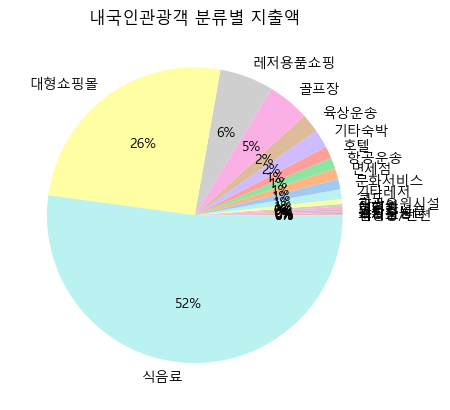

In [130]:
data = 지출액
labels = categ

#define Seaborn color palette to use
colors = sns.color_palette('pastel')[0:]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title("내국인관광객 분류별 지출액")
plt.show()

In [131]:
# reverse_categ = sorted(categ, reverse=True)
# reverse_지출액 = sorted(지출액, reverse=True)
# reverse_categ

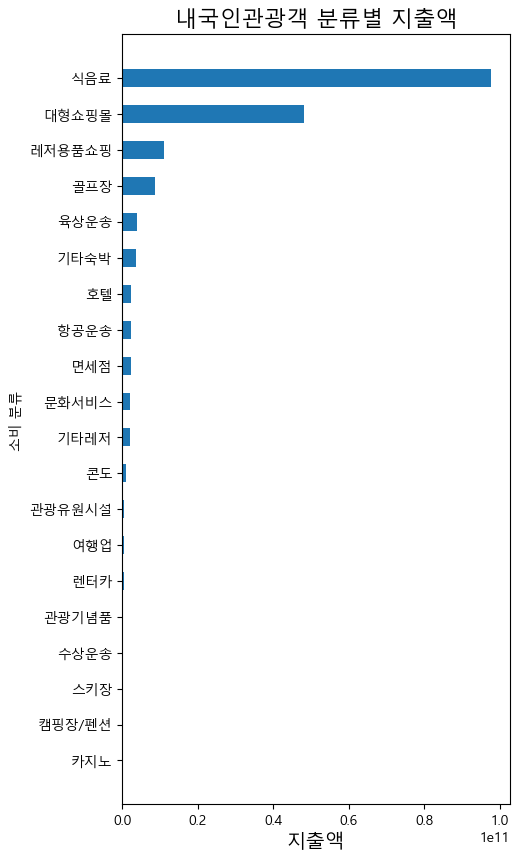

In [133]:
plt.figure(figsize=(5, 10))
plt.barh(categ, 지출액, height=0.5, align='center')
plt.title('내국인관광객 분류별 지출액', fontsize=16)
plt.xlabel('지출액', fontsize=14)
plt.ylabel('소비 분류', fontsize=10)
plt.show()